In [1]:
import datashader as ds
import dask.dataframe as dd
import datashader.transfer_functions as tf
import time

df = dd.read_csv('./data/nyc_taxi.csv', usecols=['dropoff_x', 'dropoff_y'])
# total number of data points
print("Anzahl Datenpunkte:", len(df))
df.head()

Anzahl Datenpunkte: 10679307


,dropoff_x,dropoff_y
0,-8.234835e+06,4.975627e+06
1,-8.237021e+06,4.976875e+06
2,-8.238124e+06,4.971127e+06
3,-8.238108e+06,4.974457e+06
4,-8.236804e+06,4.975483e+06


Datashader took: 0.14 seconds


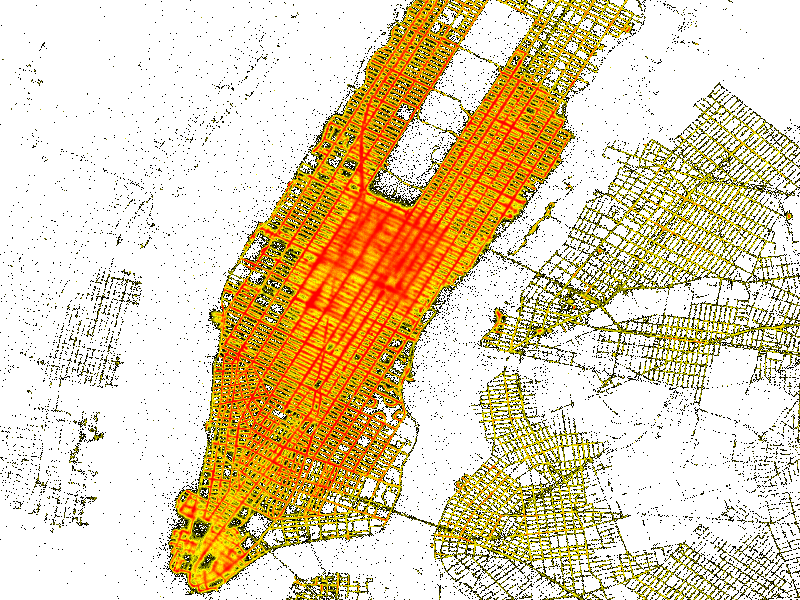

In [17]:
start_time = time.time()

canvas = ds.Canvas(
    plot_width=800,
    plot_height=600
)

agg = canvas.points(df, "dropoff_x", "dropoff_y", agg=ds.count())

img = tf.shade(agg, how="eq_hist", cmap=["black", "yellow", "red"])

end_time = time.time()
print(f"Datashader took: {end_time - start_time:.2f} seconds")

img


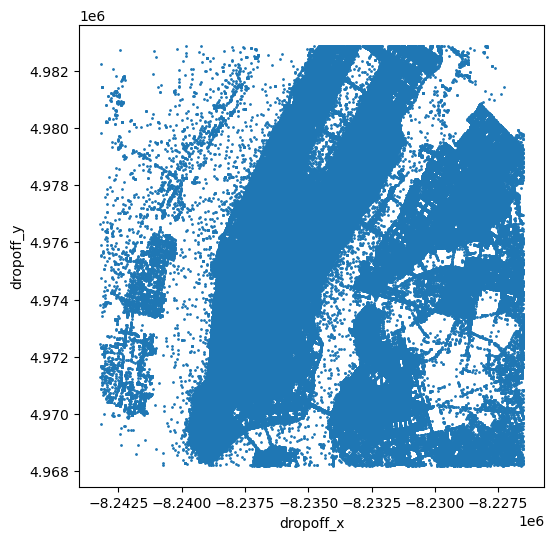

Matplotlib inkl. Rendering: 3.31 seconds


In [10]:
import matplotlib.pyplot as plt
start_mpl = time.time()

df.plot.scatter(
    x="dropoff_x",
    y="dropoff_y",
    s=1,
    figsize=(6, 6)
)
plt.show()

end_mpl = time.time()
print(f"Matplotlib inkl. Rendering: {end_mpl - start_mpl:.2f} seconds")